In [53]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# load dataset

df = pd.read_csv("data.csv")

In [55]:
# print first few rows

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Identification of Outliers

## 1.1. Graphical Methods

### 1.1.1. Univariate Outlier Detection

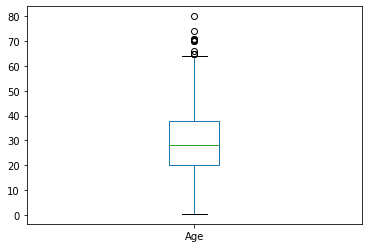

In [56]:
# using boxplot to identify the outliers in the 'Age' variable

df['Age'].plot.box()    # identify outliers in a single variable

The small circles are the outliers present in the 'Age' variable

### 1.1.2. Bivariate Outlier Detection

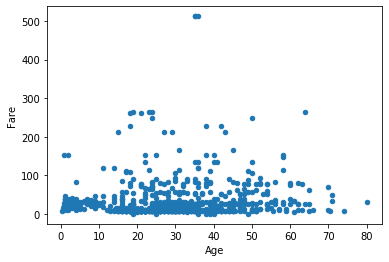

In [57]:
# creating scatter plot for 'Age' and 'Fare'

df.plot.scatter('Age','Fare')

Here we can see that all the values are in the normal range except the top two points

## 1.2. Formula Method

#### 1.2.1. Only for Univariate (Boxplot)
Outliers lie in: { < Q1 - 1.5 * IQR OR > Q3 + 1.5 * IQR }

# 2. Treating/Correcting Outliers

## 2.1. Remove/Delete the outliers from dataset

In [58]:
# removing the rows in which there are any outliers present
# remove outliers in 'Fare' variable (from scatter plot we see anything above '300' is outlier for us)

# first fetch the rows for which the values are lesss than '300'

df[df['Fare']<300]    # it will calculate the location of the values for which value of Fare is less than 300 & then subset the entire dataframe using those rows

# df = df[df['Fare']<300]    # this will modify the original dataset by removing the outliers as specified (you can check this by plotting a scatter plot again)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2.2. Impute outliers like missing values

In [71]:
# replacing outliers in 'Age' variable with 'mean Age value'
# from the boxplot we can see anything more than 60 to 65 is outlier for us

# locate the values which are outlier values using .loc[] function which takes two arguments, (row,column)

#df.loc[df['Age']>62,'Age'] = df['Age'].mean()
# check the value where the outliers vanishes
df.loc[df['Age']>62,'Age'] = np.mean(df['Age'])    # locate outliers and replace with mean as well as modify the original file

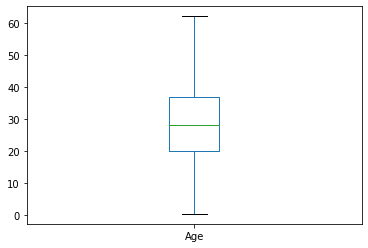

In [69]:
# check whether we have successfully imputed the outliers with the mean 'Age'

df['Age'].plot.box()

Here we can see that there are no more outliers present and we have successfully replaced the outliers with the mean age value

## 2.3. Transforming & Binning the outliers values
Ex. 'Log' transforming the original variable

## 2.4. Treating the outliers as separately
Grouping the outliers and non-outliers differently and using different methods/operations for them